In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

# Visualisation
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# data
import yfinance as yf
import pandas_datareader as pdr
from pandas_datareader.data import DataReader
import quandl

# model
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PowerTransformer
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

sns.set(color_codes = True)
pd.set_option('display.max_rows', 50)

# plt.style.use('fivethirtyeight')

In [2]:
# Check version
print('Numpy: ', np.__version__)
print('Pandas: ', pd.__version__)

Numpy:  1.19.2
Pandas:  1.1.5


In [3]:
# Business Question
# EV stocks come from different indices, Can we diversy our portfolio by just investing in EVs 
# Which EV stocks we can perform pair trading?

# Analysis question 
# To find the correlation between EV stock markets
# To Find daily return percentage
# Correlation with traditional Energy commodities

# May do some price prediction (patterns, candle stick, simple ML) - Later

In [4]:
# GET DATA

# Method 1: using Yfinance
# data = yf.download(tickers='TSLA', start='2020-01-01', end='2021-01-01', interval='5m')

# Method 2: Using Data Reader
# tsla = pdr.DataReader('TSLA', data_source='yahoo', start='2019-01-01', end='2020-12-31')
# tsla
# nio = pdr.DataReader('NIO', data_source='yahoo', start='2019-01-01', end='2020-12-31')
# nio
# xpev = pdr.DataReader('XPEV', data_source='yahoo', start='2019-01-01', end='2020-12-31')
# xpev
# toyota = pdr.DataReader('TYO', data_source='yahoo', start='2019-01-01', end='2020-12-31')
# toyota
# oil = pdr.DataReader('CL=F', data_source='yahoo', start='2019-01-01', end='2020-12-31')
# oil

# Method 3: Using DataReader with for loop
ev_stock_symbols = ['TSLA','NIO','WKHS', 'GM', 'NKLA', 'FSR', 'KNDI', 'RIDE']
trad_vehicles = ['TYO']
energy_symbols = ['OIL']

now = datetime.now()
start = datetime(now.year - 1, now.month, now.day)

for sym in ev_stock_symbols:   
    globals()[sym] = DataReader(sym, 'yahoo', start, now)
    
for sym in energy_symbols:   
    globals()[sym] = DataReader(sym, 'yahoo', start, now)
    
oil = pdr.DataReader('CL=F', data_source='yahoo', start=start, end=now)

In [5]:
# Add Name for stocks and concat dataframe

ev_stocks = [TSLA, NIO, WKHS, GM, NKLA, FSR, KNDI, RIDE]
ev_company_name = ['TSLA','NIO','WKHS', 'GM', 'NKLA', 'FSR', 'KNDI', 'RIDE']

for stock, company in zip(ev_stocks, ev_company_name):
    stock["Name"] = company
    
appended_ev_stocks = pd.concat(ev_stocks, axis=0)
appended_ev_stocks

,High,Low,Open,Close,Volume,Adj Close,Name
Date,,,,,,,
2020-02-10,163.998001,150.479996,160.000000,154.255997,123446000.0,154.255997,TSLA
2020-02-11,156.701996,151.600006,153.757996,154.876007,58487500.0,154.876007,TSLA
2020-02-12,157.949997,152.673996,155.574005,153.457993,60112500.0,153.457993,TSLA
2020-02-13,163.600006,147.000000,148.367996,160.800003,131446500.0,160.800003,TSLA
2020-02-14,162.593994,157.100006,157.444000,160.005997,78468500.0,160.005997,TSLA
...,...,...,...,...,...,...,...
2021-02-04,28.450001,26.600000,27.750000,27.410000,6238500.0,27.410000,RIDE
2021-02-05,28.370001,26.200001,28.200001,26.770000,5523100.0,26.770000,RIDE
2021-02-08,27.879999,26.530001,27.059999,27.400000,4330000.0,27.400000,RIDE


<h1>I. EDA</h1>

In [6]:
row, col = TSLA.shape
print(f'TSLA has {row} rows and {col} columns')

row, col = NIO.shape
print(f'NIO has {row} rows and {col} columns')

# row, col = XPEV.shape
# print(f'XPENG has {row} rows and {col} columns')

row, col = WKHS.shape
print(f'WORKHORSE has {row} rows and {col} columns')

TSLA has 254 rows and 7 columns
NIO has 254 rows and 7 columns
WORKHORSE has 254 rows and 7 columns


In [7]:
print(f"{TSLA.isnull().sum()}\n")
print(f"{NIO.isnull().sum()}\n")
# print(f"{XPEV.isnull().sum()}\n")
print(f"{WKHS.isnull().sum()}\n")
print(f"{appended_ev_stocks.isnull().sum()}\n")

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Name         0
dtype: int64

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Name         0
dtype: int64

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Name         0
dtype: int64

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Name         0
dtype: int64



In [8]:
appended_ev_stocks.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Name'], dtype='object')

In [9]:
TSLA.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
High,254.0,374.4,229.9,81.0,165.7,332.0,461.2,900.4
Low,254.0,355.1,221.2,70.1,159.5,304.8,437.1,871.6
Open,254.0,365.0,225.6,74.9,164.1,325.1,449.4,891.4
Close,254.0,365.8,226.5,72.2,162.4,316.1,448.1,883.1
Volume,254.0,66274352.4,33477230.9,15157700.0,40427950.0,61211650.0,85266000.0,222126200.0
Adj Close,254.0,365.8,226.5,72.2,162.4,316.1,448.1,883.1


In [10]:
NIO.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
High,254.0,22.1,20.1,2.4,4.1,14.4,43.0,67.0
Low,254.0,20.4,18.7,2.1,3.8,13.3,38.4,62.2
Open,254.0,21.3,19.5,2.3,4.0,13.9,39.9,64.9
Close,254.0,21.4,19.5,2.4,4.0,13.9,41.6,62.8
Volume,254.0,111656403.1,93809291.7,13699000.0,50359350.0,78762300.0,133302475.0,577185100.0
Adj Close,254.0,21.4,19.5,2.4,4.0,13.9,41.6,62.8


In [11]:
WKHS.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
High,254.0,15.5,10.9,1.6,3.2,17.3,23.5,43.0
Low,254.0,13.9,9.7,1.3,2.9,15.8,21.4,38.8
Open,254.0,14.6,10.2,1.4,3.1,16.5,22.3,41.3
Close,254.0,14.7,10.3,1.5,3.1,16.4,22.4,41.3
Volume,254.0,16224576.8,21500123.4,590500.0,2287675.0,10984150.0,20153850.0,165502100.0
Adj Close,254.0,14.7,10.3,1.5,3.1,16.4,22.4,41.3


In [12]:
ev_stocks

[                  High         Low        Open       Close       Volume  \
 Date                                                                      
 2020-02-10  163.998001  150.479996  160.000000  154.255997  123446000.0   
 2020-02-11  156.701996  151.600006  153.757996  154.876007   58487500.0   
 2020-02-12  157.949997  152.673996  155.574005  153.457993   60112500.0   
 2020-02-13  163.600006  147.000000  148.367996  160.800003  131446500.0   
 2020-02-14  162.593994  157.100006  157.444000  160.005997   78468500.0   
 ...                ...         ...         ...         ...          ...   
 2021-02-04  856.500000  833.419983  855.000000  849.989990   15812700.0   
 2021-02-05  864.770020  838.969971  845.000000  852.229980   18524800.0   
 2021-02-08  877.770020  854.750000  869.669983  863.419983   20161700.0   
 2021-02-09  859.799988  841.750000  855.119995  849.460022   15157700.0   
 2021-02-10  844.820007  800.020020  843.640015  804.820007   36087000.0   
 
          

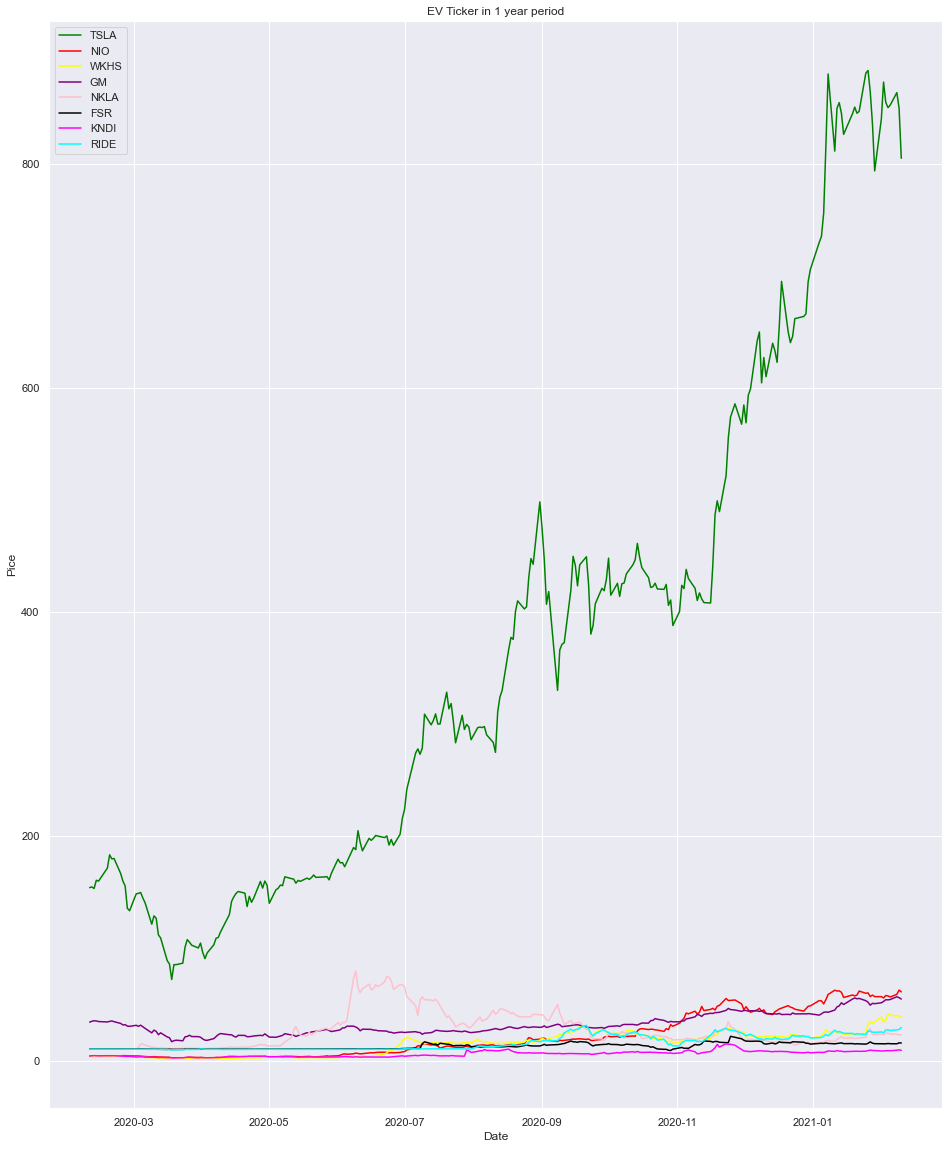

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(16,20))

plt.title('EV Ticker in 1 year period')
plt.xlabel('Date')
plt.ylabel('Pice')

# ``'b'``          blue
# ``'g'``          green
# ``'r'``          red
# ``'c'``          cyan
# ``'m'``          magenta
# ``'y'``          yellow
# ``'k'``          black
# ``'w'``          white

colors = ['green', 'red', 'yellow', 'purple', 'pink', 'black', 'magenta', 'cyan']

for i, ev in enumerate(ev_stocks, start=0):
    _, = plt.plot(ev.index, ev['Close'], color=colors[i])
    _.set_label(ev_stock_symbols[i])
    
plt.legend()
plt.show()

plt.savefig('ev_price.png')
# Maybe divide TSLA Close price so prices are closer to other stocks
# plt.plot(TSLA.index, tsla.Close/7, color='green')
# plt.plot(nio.index, nio.Close, color='red')
# plt.plot(xpeng.index, xpeng.Close, color='yellow')
# plt.plot(toyota.index, toyota.Close, color='brown')
# plt.plot(oil.index, oil.Close, color='purple')
# plt.show()


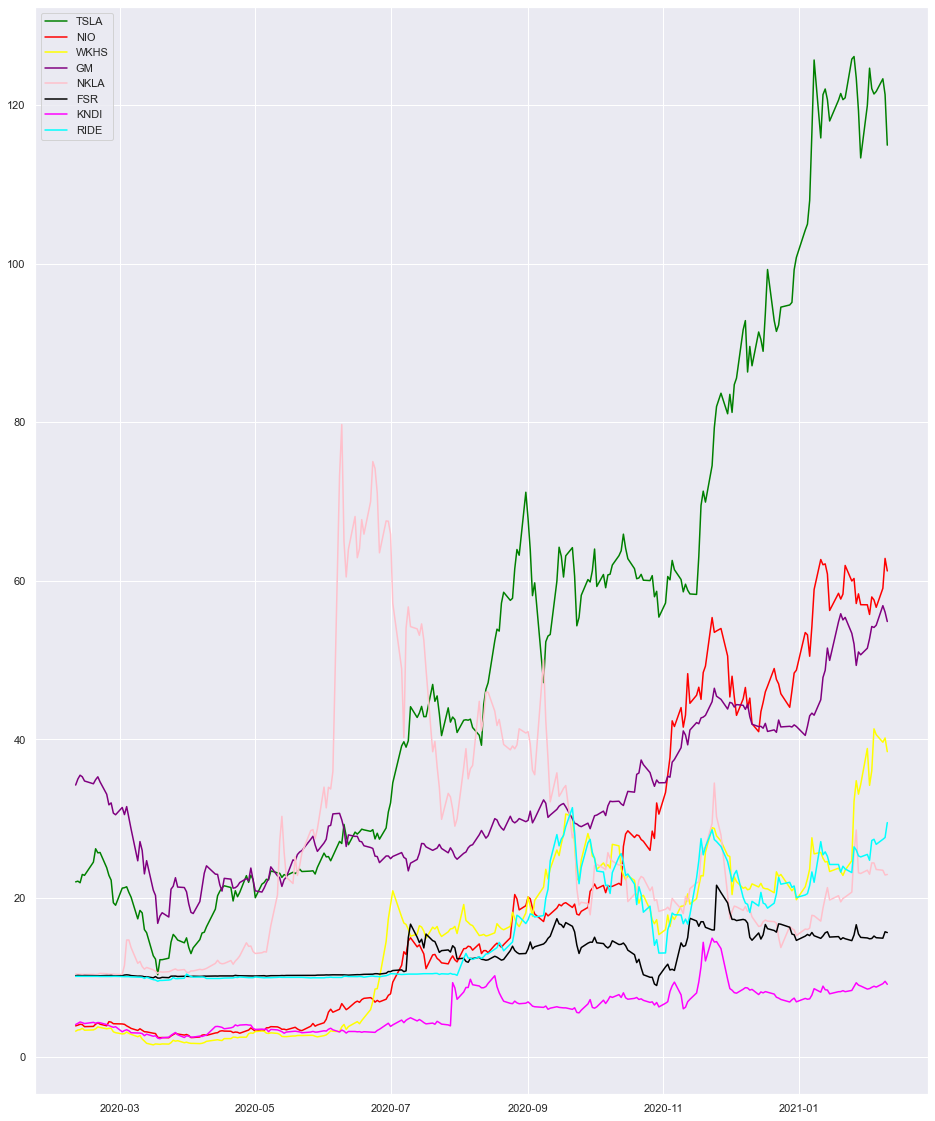

In [14]:
plt.figure(figsize=(16,20))

for i, ev in enumerate(ev_stocks, start=0):
    
    close = ev['Close']
    
    if ev.iloc[0,6] == 'TSLA':
        close = close/7
        
    _, = plt.plot(ev.index, close, color=colors[i])
    _.set_label(ev_stock_symbols[i])
    
plt.legend()
plt.show()



In [15]:
# XPEV.describe().round(1).T

In [16]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2020-02-10 to 2021-02-10
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    float64
 5   Adj Close  254 non-null    float64
 6   Name       254 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.9+ KB


In [17]:
# XPEV.info()

{'whiskers': [<matplotlib.lines.Line2D at 0x128886a30>,
 'caps': [<matplotlib.lines.Line2D at 0x128894130>,
 'boxes': [<matplotlib.lines.Line2D at 0x1288866d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1288947f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x128894b50>,
 'means': []}

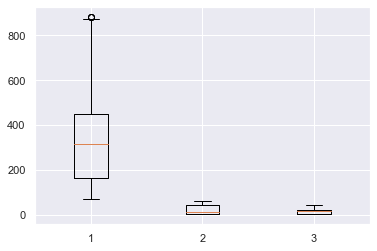

In [18]:
plt.boxplot([TSLA.Close, NIO.Close, WKHS.Close])

(array([43., 57., 27., 14., 55.,  6., 13., 12.,  4., 23.]),
 array([ 72.2440033 , 153.32860565, 234.41320801, 315.49781036,
        396.58241272, 477.66701508, 558.75161743, 639.83621979,
        720.92082214, 802.0054245 , 883.09002686]),
 <BarContainer object of 10 artists>)

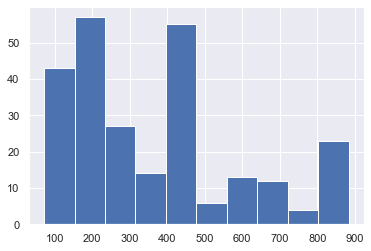

In [19]:
plt.hist(TSLA.Close)

<h1>II. TSLA vs NIO Daily Return</h1>

In [20]:
now = datetime.now()
offset = 0
start = datetime(now.year - 1, now.month, now.day)
start_2 = datetime(now.year - 1, now.month, now.day+offset)

tsla_open_prices = DataReader('TSLA', data_source='yahoo', start=start, end=now)['Adj Close']
tsla_open_prices.head()

tsla_open_prices = tsla_open_prices.to_frame()

In [21]:
nio_closing_prices = DataReader('NKLA', data_source='yahoo', start=start_2, end=now)['Adj Close']
nio_closing_prices.head()
nio_closing_prices = nio_closing_prices.to_frame()

In [22]:


tsla_daily_return = tsla_open_prices['Adj Close'].pct_change()
nio_daily_return = nio_closing_prices['Adj Close'].pct_change()

# plt.plot(tsla_open_prices)
# plt.plot(nio_closing_prices)
# tsla_open_prices['nio_close'] = nio_closing_prices['Adj Close']
# ccorr = tsla_open_prices.corr()
# sns.heatmap(ccorr, annot=True)

In [23]:
nio_daily_return = nio_daily_return.to_frame()
tsla_daily_return = tsla_daily_return.to_frame()

In [24]:

tsla_daily_return['nio_daily_return'] = nio_daily_return['Adj Close']


In [25]:
tsla_daily_return = tsla_daily_return.fillna(0)
tsla_daily_return

,Adj Close,nio_daily_return
Date,,
2020-02-10,0.000000,0.000000
2020-02-11,0.004019,-0.001923
2020-02-12,-0.009156,0.000000
2020-02-13,0.047844,-0.000963
2020-02-14,-0.004938,-0.000964
...,...,...
2021-02-04,-0.005499,-0.000409
2021-02-05,0.002635,-0.033579
2021-02-08,0.013130,-0.004237


<AxesSubplot:>

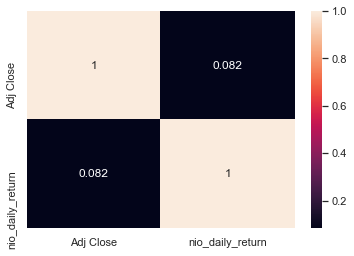

In [26]:
sns.heatmap(tsla_daily_return[offset:].corr(), annot=True)

<h1>III. The correlation between different EV stocks closing prices</h1>

In [27]:
plt.figure(figsize=(10,12))
# Method 1: Concat close column
# close_prices = pd.concat(
#                     [
#                         tsla[["Close"]].rename(columns={'Close':'tsla_close'}), 
#                         nio[["Close"]].rename(columns={'Close':'nio_close'}),
#                         xpeng[["Close"]].rename(columns={'Close':'expeng_close'}),
#                         toyota[["Close"]].rename(columns={'Close':'toyota_close'}),
#                         oil[["Close"]].rename(columns={'Close':'oil_close'})
#                     ], 
#                         axis=1)

# Method 2: Combine Ajusted Closing price of all stocks to one Dataframe

now = datetime.now()
start = datetime(now.year - 1, now.month, now.day)

closing_prices = DataReader(ev_stock_symbols, data_source='yahoo', start=start, end=now)['Adj Close']
closing_prices.head()

Symbols,TSLA,NIO,WKHS,GM,NKLA,FSR,KNDI,RIDE
Date,,,,,,,,
2020-02-10,154.255997,3.87,3.20,33.837219,10.40,10.20,4.04,10.12
2020-02-11,154.876007,3.96,3.35,34.588058,10.38,10.23,4.19,10.12
2020-02-12,153.457993,4.07,3.39,35.062275,10.38,10.22,4.36,10.12
2020-02-13,160.800003,4.03,3.56,34.864685,10.37,10.20,4.27,10.12
2020-02-14,160.005997,3.77,3.32,34.341072,10.36,10.22,4.16,10.12


<Figure size 720x864 with 0 Axes>

In [28]:
# sns.pairplot(data=closing_prices, kind='reg')

Text(0.5, 1.0, "Correlation between EV stock's closing prices")

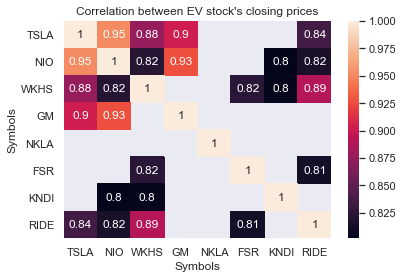

In [29]:
# Visualise Correlation between closing prices
ev_corr = closing_prices.corr()
sns.heatmap(ev_corr, annot=True, mask= (ev_corr < 0.8))
plt.title("Correlation between EV stock's closing prices")
# plt.savefig('corr_ev_closing_prices.png')

In [30]:
# regr = linear_model.LinearRegression()

In [31]:
# regr.fit(np.array(daily_return_percentage['TSLA'].fillna(0)).reshape(-1,1), np.array(daily_return_percentage['NIO'].fillna(0)).reshape(-1,1))
# print(regr.intercept_)
# print(regr.coef_)

<h3>CONCLUSION</h3>
<p>TSLA and NIO, TSLA and WKHS, NIO and WKHS, NIO and XPEV show strong positive correlation in closing prices</p>

<h1>IV. The correlation between different EV stocks opening prices</h1>

In [32]:
now = datetime.now()
start = datetime(now.year - 1, now.month, now.day)

open_prices = DataReader(ev_stock_symbols, data_source='yahoo', start=start, end=now)['Open']
open_prices.head()

Symbols,TSLA,NIO,WKHS,GM,NKLA,FSR,KNDI,RIDE
Date,,,,,,,,
2020-02-10,160.000000,3.67,3.03,33.990002,10.38,10.20,4.08,10.12
2020-02-11,153.757996,3.83,3.24,34.340000,10.37,10.18,4.05,10.12
2020-02-12,155.574005,4.00,3.35,35.330002,10.38,10.22,4.22,10.12
2020-02-13,148.367996,3.95,3.35,35.209999,10.38,10.21,4.32,10.12
2020-02-14,157.444000,4.02,3.53,35.299999,10.36,10.22,4.28,10.12


Text(0.5, 1.0, "Correlation between EV stock's open prices")

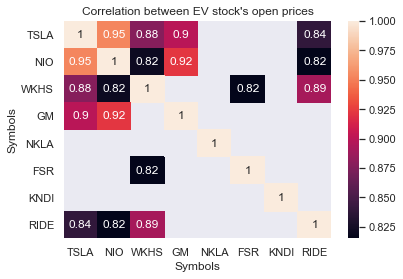

In [33]:
# Visualise Correlation between open prices
ev_open_corr = open_prices.corr()
sns.heatmap(ev_open_corr, annot=True, mask = (ev_open_corr < 0.8))
plt.title("Correlation between EV stock's open prices")

<h1>V. Daily Return between Ev</h1>

In [34]:
ev_stocks

[                  High         Low        Open       Close       Volume  \
 Date                                                                      
 2020-02-10  163.998001  150.479996  160.000000  154.255997  123446000.0   
 2020-02-11  156.701996  151.600006  153.757996  154.876007   58487500.0   
 2020-02-12  157.949997  152.673996  155.574005  153.457993   60112500.0   
 2020-02-13  163.600006  147.000000  148.367996  160.800003  131446500.0   
 2020-02-14  162.593994  157.100006  157.444000  160.005997   78468500.0   
 ...                ...         ...         ...         ...          ...   
 2021-02-04  856.500000  833.419983  855.000000  849.989990   15812700.0   
 2021-02-05  864.770020  838.969971  845.000000  852.229980   18524800.0   
 2021-02-08  877.770020  854.750000  869.669983  863.419983   20161700.0   
 2021-02-09  859.799988  841.750000  855.119995  849.460022   15157700.0   
 2021-02-10  844.820007  800.020020  843.640015  804.820007   36087000.0   
 
          

<Figure size 864x1440 with 0 Axes>

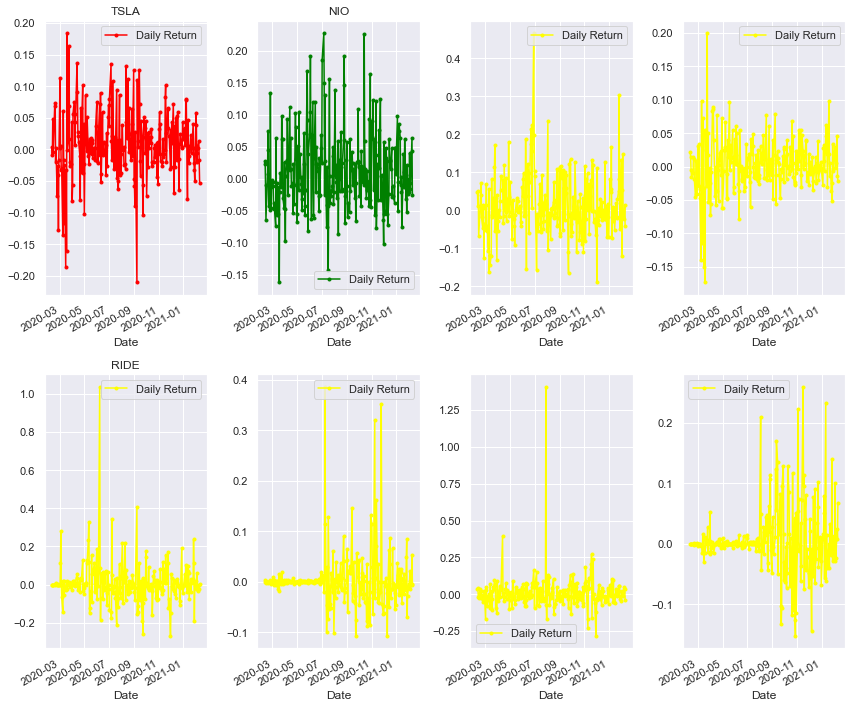

<Figure size 864x1440 with 0 Axes>

In [35]:
# We'll use pct_change to find the percent change for each day
for ev in ev_stocks:
    ev['Daily Return'] = ev['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=4)
fig.set_figheight(10)
fig.set_figwidth(12)

# ['TSLA','NIO','WKHS', 'GM', 'NKLA', 'FSR', 'KNDI', 'RIDE']

TSLA['Daily Return'].plot(ax=axes[0,0], linestyle='-', marker='.', legend=True, color='red')
axes[0,0].set_title('TSLA')

NIO['Daily Return'].plot(ax=axes[0,1], linestyle='-', marker='.', legend=True, color='green')
axes[0,1].set_title('NIO')

WKHS['Daily Return'].plot(ax=axes[0,2], linestyle='-', marker='.', legend=True, color='yellow')
axes[1,0].set_title('WKHS')

# XPEV['Daily Return'].plot(ax=axes[1,1], linestyle='-', marker='.', legend=True, color='pink')
# axes[1,1].set_title('XPEV')

GM['Daily Return'].plot(ax=axes[0,3], linestyle='-', marker='.', legend=True, color='yellow')
axes[1,0].set_title('GM')

NKLA['Daily Return'].plot(ax=axes[1,0], linestyle='-', marker='.', legend=True, color='yellow')
axes[1,0].set_title('NKLA')

FSR['Daily Return'].plot(ax=axes[1,1], linestyle='-', marker='.', legend=True, color='yellow')
axes[1,0].set_title('FSR')

KNDI['Daily Return'].plot(ax=axes[1,2], linestyle='-', marker='.', legend=True, color='yellow')
axes[1,0].set_title('KNDI')

RIDE['Daily Return'].plot(ax=axes[1,3], linestyle='-', marker='.', legend=True, color='yellow')
axes[1,0].set_title('RIDE')

fig.tight_layout()
plt.figure(figsize=(12,20))

/opt/anaconda3/envs/py38_for_data/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/py38_for_data/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/py38_for_data/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

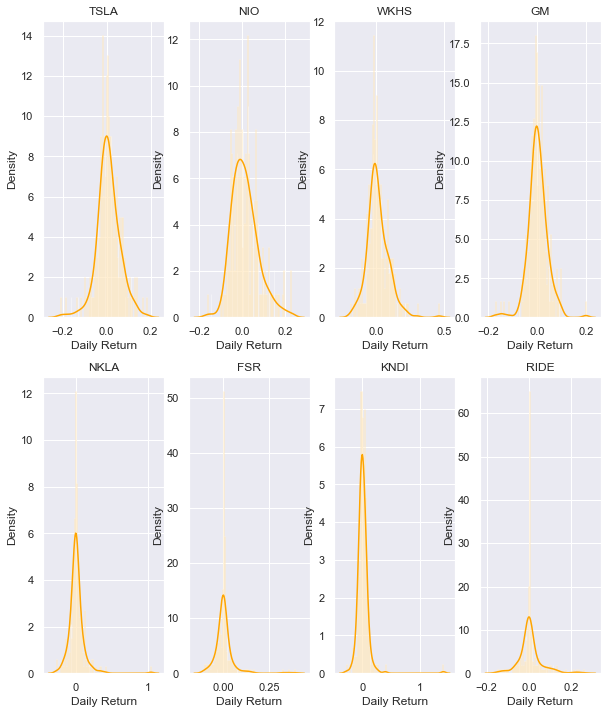

In [36]:
plt.figure(figsize=(10,12))

row = 2
col = 4

for i, company in enumerate(ev_stocks, 1):
    plt.subplot(row, col, i)
    sns.distplot(company['Daily Return'], bins=100, color='orange')
    plt.title(f"{ev_company_name[i - 1]}")

In [37]:
# Find percentage change per day for closing prices
daily_return_percentage = closing_prices.pct_change()
daily_return_percentage = daily_return_percentage.fillna(method='bfill')
daily_return_percentage

Symbols,TSLA,NIO,WKHS,GM,NKLA,FSR,KNDI,RIDE
Date,,,,,,,,
2020-02-10,0.004019,0.023256,0.046875,0.022190,-0.001923,0.002941,0.037129,0.000000
2020-02-11,0.004019,0.023256,0.046875,0.022190,-0.001923,0.002941,0.037129,0.000000
2020-02-12,-0.009156,0.027778,0.011940,0.013710,0.000000,-0.000977,0.040573,0.000000
2020-02-13,0.047844,-0.009828,0.050147,-0.005635,-0.000963,-0.001957,-0.020642,0.000000
2020-02-14,-0.004938,-0.064516,-0.067416,-0.015018,-0.000964,0.001961,-0.025761,0.000000
...,...,...,...,...,...,...,...,...
2021-02-04,-0.005499,-0.006554,0.146741,-0.002212,-0.000409,0.020819,0.016037,0.005872
2021-02-05,0.002635,-0.016146,-0.017658,0.005173,-0.033579,-0.013816,-0.012401,-0.023349
2021-02-08,0.013130,0.042350,-0.023639,0.045396,-0.004237,-0.004003,0.049087,0.023534


In [38]:
# Compare the stock itself to find linear. 
# Of course, it should be a perfect linear relationship
# sns.lmplot('TSLA', 'TSLA', data=daily_return_percentage)

In [39]:
# sns.lmplot('TSLA', 'NIO', data=daily_return_percentage)

In [40]:
# sns.lmplot('TSLA', 'XPEV', data=daily_return_percentage)

In [41]:
# sns.pairplot(data=daily_return_percentage, kind='reg')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

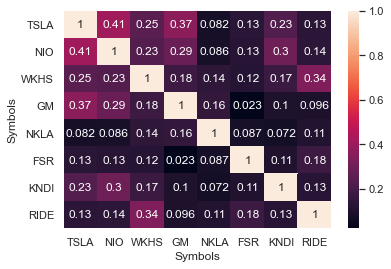

In [42]:
# Correlation between daily return percentage
sns.heatmap(daily_return_percentage.corr(), annot=True)
# plt.savefig('corr_ev_daily_return.png')

<h1>VI. Pair Trading EV</h1>

In [43]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.01:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [44]:
energy =['TSLA','NIO','WKHS', 'GM', 'NKLA', 'FSR', 'KNDI', 'RIDE']

now = datetime.now()
start = datetime(now.year - 1, now.month, now.day)

data = yf.download(energy, start=start, end=now)
data = data['Close']
# data.fillna(0)

[*********************100%***********************]  8 of 8 completed


<AxesSubplot:>

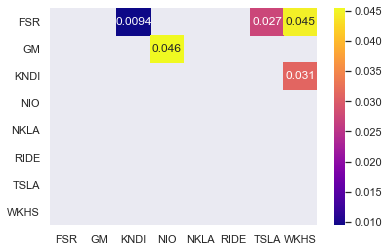

In [45]:
scores, pvalues, pairs = find_cointegrated_pairs(data)
sns.heatmap(pvalues, xticklabels = data.columns, yticklabels = data.columns, cmap = 'plasma', mask = (pvalues > 0.05), annot=True)
# plt.savefig('pair_trade_ev_corr.png')

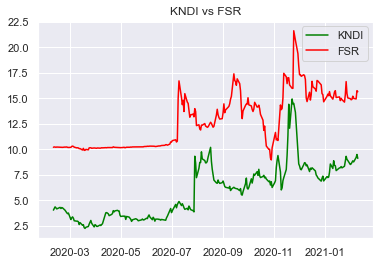

In [46]:
plt.plot(data['KNDI'], color='green', label='KNDI')
plt.plot(data['FSR'], color='red', label='FSR')
plt.title('KNDI vs FSR')
plt.legend()
plt.savefig('KNDI_vs_FSR_paid_trade_chart.png')

<h1>Compare with Traditional Vehicle</h1>

In [47]:
# ev_tradv_closing_prices = DataReader(['TSLA', 'TYO'], data_source='yahoo', start=start, end=now)['Adj Close']
# ev_tradv_closing_prices.head()

In [48]:
# sns.heatmap(ev_tradv_closing_prices.corr(), annot=True)

In [49]:
# plt.plot(ev_tradv_closing_prices.index, ev_tradv_closing_prices["TSLA"], color='green')
# plt.plot(ev_tradv_closing_prices.index, ev_tradv_closing_prices["TYO"]*100, color='red')

<h1>VII. EV Vs OIL</h1>

<h3>Closing Price</h3>

In [50]:
now = datetime.now()
start = datetime(now.year - 1, now.month, now.day)
ev_oil_closing_prices = DataReader(['CL=F','TSLA','NIO','WKHS', 'GM', 'NKLA', 'FSR', 'KNDI', 'RIDE'], data_source='yahoo', start=start, end=now)['Adj Close']
ev_oil_closing_prices

Symbols,CL=F,TSLA,NIO,WKHS,GM,NKLA,FSR,KNDI,RIDE
Date,,,,,,,,,
2020-02-10,49.570000,154.255997,3.870000,3.200000,33.837219,10.400000,10.20,4.04,10.120000
2020-02-11,49.939999,154.876007,3.960000,3.350000,34.588058,10.380000,10.23,4.19,10.120000
2020-02-12,51.169998,153.457993,4.070000,3.390000,35.062275,10.380000,10.22,4.36,10.120000
2020-02-13,51.419998,160.800003,4.030000,3.560000,34.864685,10.370000,10.20,4.27,10.120000
2020-02-14,52.049999,160.005997,3.770000,3.320000,34.341072,10.360000,10.22,4.16,10.120000
...,...,...,...,...,...,...,...,...,...
2021-02-05,56.849998,852.229980,56.669998,40.610001,54.410000,23.600000,14.99,8.76,26.770000
2021-02-08,57.970001,863.419983,59.070000,39.650002,56.880001,23.500000,14.93,9.19,27.400000
2021-02-09,58.360001,849.460022,62.840000,40.189999,56.060001,22.900000,15.74,9.49,27.629999


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

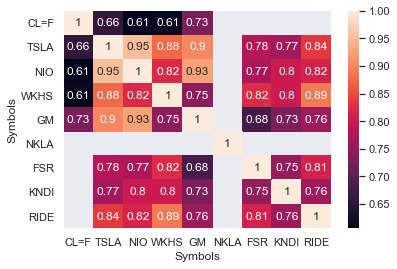

In [51]:
sns.heatmap(ev_oil_closing_prices.corr(), mask = (ev_oil_closing_prices.corr() <= 0.6), annot=True)
# plt.savefig('EV_stock_OIL_closing_price.png')

In [52]:
# sns.lmplot('TSLA', 'CL=F', data=ev_oil_closing_prices)

In [53]:
# plt.figure(figsize=(10,12))
# plt.plot(ev_oil_closing_prices.index, ev_oil_closing_prices.TSLA/8, color='green')
# plt.plot(ev_oil_closing_prices.index, ev_oil_closing_prices["CL=F"], color='red')

In [54]:
# now = datetime.now()
# start = datetime(2020,6,30)
# ev_oil_closing_prices = DataReader(['CL=F','TSLA','NIO','WKHS', 'GM', 'NKLA', 'FSR', 'KNDI', 'RIDE'], data_source='yahoo', start=start, end=now)['Adj Close']
# ev_oil_closing_prices

In [55]:
# plt.figure(figsize=(10,12))
# plt.plot(ev_oil_closing_prices.index, ev_oil_closing_prices.TSLA, scalex=True, color='green')
# plt.plot(ev_oil_closing_prices.index, ev_oil_closing_prices["CL=F"], scalex=True, color='red')

In [56]:
# sns.heatmap(ev_oil_closing_prices.corr(), annot=True)

<h3>Opening Price</h3>

In [57]:
now = datetime.now()
start = datetime(now.year - 1, now.month, now.day)
ev_oil_open_prices = DataReader(['CL=F','TSLA','NIO','WKHS', 'GM', 'NKLA', 'FSR', 'KNDI', 'RIDE'], data_source='yahoo', start=start, end=now)['Open']
ev_oil_open_prices

Symbols,CL=F,TSLA,NIO,WKHS,GM,NKLA,FSR,KNDI,RIDE
Date,,,,,,,,,
2020-02-10,50.119999,160.000000,3.670000,3.030000,33.990002,10.380000,10.20,4.08,10.120000
2020-02-11,49.610001,153.757996,3.830000,3.240000,34.340000,10.370000,10.18,4.05,10.120000
2020-02-12,49.959999,155.574005,4.000000,3.350000,35.330002,10.380000,10.22,4.22,10.120000
2020-02-13,51.720001,148.367996,3.950000,3.350000,35.209999,10.380000,10.21,4.32,10.120000
2020-02-14,51.509998,157.444000,4.020000,3.530000,35.299999,10.360000,10.22,4.28,10.120000
...,...,...,...,...,...,...,...,...,...
2021-02-05,56.459999,845.000000,57.740002,41.270000,54.820000,24.750000,15.34,8.94,28.200001
2021-02-08,57.060001,869.669983,57.080002,39.764999,56.000000,23.510000,15.17,8.93,27.059999
2021-02-09,58.110001,855.119995,58.950001,38.756001,56.540001,23.124001,14.95,9.22,27.420000


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

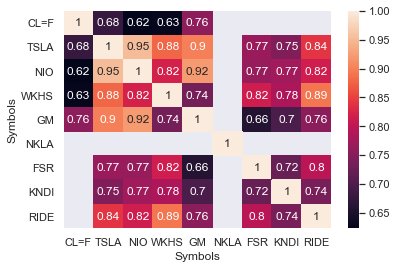

In [58]:
sns.heatmap(ev_oil_open_prices.corr(), mask = (ev_oil_open_prices.corr() <= 0.6), annot=True)
# plt.savefig('EV_stock_OIL_opening_price.png')

<h3>Pair Trade EV vs OIL</h3>

In [59]:
energy = ['CL=F','TSLA','NIO','WKHS', 'GM', 'NKLA', 'FSR', 'KNDI', 'RIDE']

now = datetime.now()
start = datetime(now.year - 1, now.month, now.day)

oil_tsla = DataReader(energy, data_source='yahoo', start='2020-08-15', end="2021-02-07")
oil_tsla = oil_tsla['Close']
oil_tsla.fillna(method='ffill', inplace=True)

In [61]:
oil_tsla.tail()

Symbols,CL=F,TSLA,NIO,WKHS,GM,NKLA,FSR,KNDI,RIDE
Date,,,,,,,,,
2021-02-01,53.549999,839.809998,56.990002,38.860001,51.509998,23.51,14.96,8.51,25.50
2021-02-02,54.759998,872.789978,55.770000,34.209999,52.720001,23.00,14.85,8.57,24.76
2021-02-03,55.689999,854.690002,57.980000,36.049999,54.250000,24.43,14.89,8.73,27.25
2021-02-04,56.230000,849.989990,57.599998,41.340000,54.130001,24.42,15.20,8.87,27.41
2021-02-05,56.849998,852.229980,56.669998,40.610001,54.410000,23.60,14.99,8.76,26.77


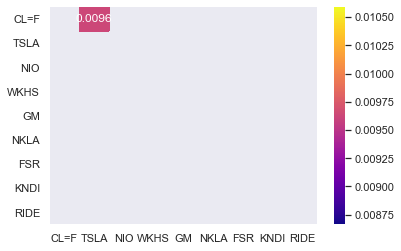

In [62]:
scores, pvalues, pairs = find_cointegrated_pairs(oil_tsla)
sns.heatmap(pvalues, xticklabels = oil_tsla.columns, yticklabels = oil_tsla.columns, cmap = 'plasma', mask = (pvalues >= 0.01), annot=True)
plt.savefig('EV_stock_OIL_Pairs_trading.png')

<Figure size 720x864 with 0 Axes>

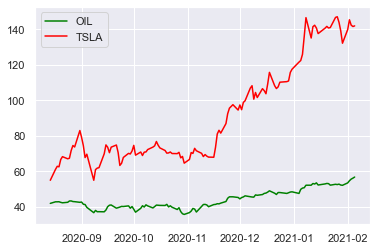

<Figure size 720x864 with 0 Axes>

In [63]:
plt.plot(oil_tsla['CL=F'], color='green', label='OIL')
plt.plot(oil_tsla['TSLA']/6, color='red', label ='TSLA')
plt.legend()
plt.savefig('tsla_oil_pair_trading_line.png')
plt.figure(figsize=(10,12))


# fig = plt.figure()
# fig.tight_layout()
# plt.setp(ax.get_xticklabels(), rotation=45)
# leg = plt.legend()
# leg_lines = leg.get_lines()

<h1>VIII. LINEAR REGRESSION</h1>

In [93]:
# Reference: From Kaggle
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


<h3>TSLA</h3>

In [65]:
from pandas_datareader.data import DataReader
tsla_lin = DataReader('TSLA', data_source='yahoo', start=start, end=now)

In [66]:
tsla_lin.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-04,856.500000,833.419983,855.000000,849.989990,15812700.0,849.989990
2021-02-05,864.770020,838.969971,845.000000,852.229980,18524800.0,852.229980
2021-02-08,877.770020,854.750000,869.669983,863.419983,20161700.0,863.419983
2021-02-09,859.799988,841.750000,855.119995,849.460022,15157700.0,849.460022
2021-02-10,844.820007,800.020020,843.640015,804.820007,36087000.0,804.820007


<AxesSubplot:>

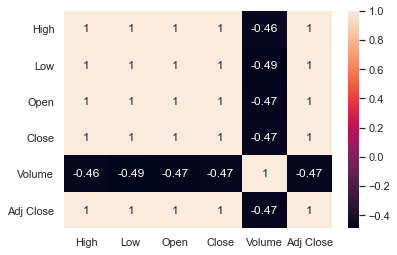

In [67]:
# tsla_model = tsla_lin.drop('')
sns.heatmap(tsla_lin.corr(), annot=True)

In [68]:
x = tsla_lin[['Open', 'Volume']]
y = tsla_lin['Adj Close']

In [69]:
x_train, x_test, y_train, y_test = timeseries_train_test_split(x,y, test_size=0.3)

In [70]:
lr = LinearRegression()

In [71]:
lr.fit(x_train, y_train)

LinearRegression()

In [72]:
print(f"Slope: {lr.coef_} -- Intercept: {lr.intercept_}")

Slope: [ 9.98242888e-01 -5.00570534e-09] -- Intercept: 1.0031236561149228


In [73]:
predicted = lr.predict(x_test)
predicted

array([422.79836736, 441.94643989, 421.93312245, 411.76849135,
       423.90497763, 416.62393035, 410.12936368, 406.9753496 ,
       394.1655504 , 409.84123858, 430.70557227, 428.40830573,
       436.22819931, 439.55650914, 420.20338098, 416.63449896,
       415.2244333 , 411.03225193, 409.08023436, 460.05827617,
       448.17466326, 491.82589154, 497.95334236, 503.36682945,
       540.18505605, 549.85167396, 580.95391376, 601.83962014,
       597.34097343, 556.22624754, 589.77340908, 590.82748832,
       604.57832456, 625.09235054, 653.18765672, 574.02808755,
       614.69985172, 618.65497134, 642.92646179, 627.91851443,
       627.80765428, 667.61591742, 665.78189785, 647.60563994,
       631.92623529, 642.74884992, 674.16636654, 660.72698782,
       671.60786985, 699.51501567, 718.9555052 , 723.23013511,
       757.9366069 , 777.00895711, 855.12530471, 848.61254671,
       830.31134599, 852.0979859 , 842.75469759, 851.31260412,
       837.2040232 , 858.1057355 , 854.39768477, 833.74

In [74]:
actual_vs_predicted = pd.DataFrame({'Actual': np.array(y_test).flatten(), 'Predicted' : predicted.flatten()})
actual_vs_predicted

,Actual,Predicted
0,422.640015,422.798367
1,425.790009,441.946440
2,420.630005,421.933122
3,420.279999,411.768491
4,424.679993,423.904978
...,...,...
72,849.989990,854.421639
73,852.229980,844.425634
74,863.419983,869.044075
75,849.460022,854.544702


In [75]:
pd.set_option('display.max_rows', 100)
actual_vs_predicted.head()

,Actual,Predicted
0,422.640015,422.798367
1,425.790009,441.946440
2,420.630005,421.933122
3,420.279999,411.768491
4,424.679993,423.904978


In [76]:
metrics.r2_score(actual_vs_predicted.Actual, actual_vs_predicted.Predicted)

0.9870040429430829

In [77]:
y_test = y_test.to_frame()
y_test = y_test.reset_index()
predicted_df = pd.DataFrame(predicted, columns=['predicted_price'])
predicted_df

,predicted_price
0,422.798367
1,441.946440
2,421.933122
3,411.768491
4,423.904978
5,416.623930
6,410.129364
7,406.975350
8,394.165550
9,409.841239


In [78]:
y_test['predicted_price'] = predicted_df['predicted_price']
y_test = y_test.set_index('Date')
y_test.columns = y_test.columns.str.replace('Adj Close', 'test_adj_close')
y_test

,test_adj_close,predicted_price
Date,,
2020-10-21,422.640015,422.798367
2020-10-22,425.790009,441.946440
2020-10-23,420.630005,421.933122
2020-10-26,420.279999,411.768491
2020-10-27,424.679993,423.904978
2020-10-28,406.019989,416.623930
2020-10-29,410.829987,410.129364
2020-10-30,388.040009,406.975350
2020-11-02,400.510010,394.165550


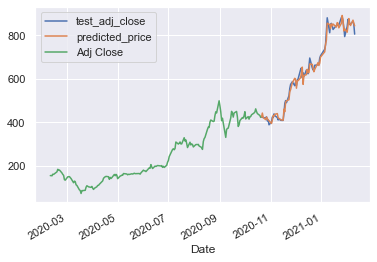

In [79]:
a1 = y_test['test_adj_close'].plot()
a2 = y_test['predicted_price'].plot()
a3 = y_train.plot()

plt.legend()
plt.savefig('tsla_pred.png')

<h2>NIO LIN</h2>

In [80]:
# nio_lin = DataReader(['NIO'], data_source='yahoo', start=start, end=now)

In [81]:
# nio_lin.head()

In [82]:
# x = tsla_lin[['High', 'Low', 'Open', 'Volume']].values
# y = tsla_lin['Adj Close'].values

In [83]:
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [84]:
# lr = LinearRegression()

In [85]:
# lr.fit(x_train, y_train)

In [86]:
# print(f"Slope: {lr.coef_} -- Intercept: {lr.intercept_}")

In [87]:
# predicted = lr.predict(x_test)
predicted

array([422.79836736, 441.94643989, 421.93312245, 411.76849135,
       423.90497763, 416.62393035, 410.12936368, 406.9753496 ,
       394.1655504 , 409.84123858, 430.70557227, 428.40830573,
       436.22819931, 439.55650914, 420.20338098, 416.63449896,
       415.2244333 , 411.03225193, 409.08023436, 460.05827617,
       448.17466326, 491.82589154, 497.95334236, 503.36682945,
       540.18505605, 549.85167396, 580.95391376, 601.83962014,
       597.34097343, 556.22624754, 589.77340908, 590.82748832,
       604.57832456, 625.09235054, 653.18765672, 574.02808755,
       614.69985172, 618.65497134, 642.92646179, 627.91851443,
       627.80765428, 667.61591742, 665.78189785, 647.60563994,
       631.92623529, 642.74884992, 674.16636654, 660.72698782,
       671.60786985, 699.51501567, 718.9555052 , 723.23013511,
       757.9366069 , 777.00895711, 855.12530471, 848.61254671,
       830.31134599, 852.0979859 , 842.75469759, 851.31260412,
       837.2040232 , 858.1057355 , 854.39768477, 833.74

In [88]:
# actual_vs_predicted = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})

In [89]:
# pd.set_option('display.max_rows', 100)
# actual_vs_predicted.head()

In [90]:
# metrics.r2_score(actual_vs_predicted.Actual, actual_vs_predicted.Predicted)

In [91]:
# plt.plot(actual_vs_predicted.Actual)
# plt.plot(actual_vs_predicted.Predicted)